In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Code starts here
df = pd.read_csv(filepath_or_buffer=r"C:\Users\tdhoble\Downloads\Lending Club Loan Prediction.zip", compression='zip', low_memory=False)
df.head()
# Code ends here

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,NaN,NaN,8000.0,8000.0,8000.0,36 months,10.99%,261.88,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,20800.0,NaN,NaN,NaN
1,NaN,NaN,20800.0,20800.0,20800.0,36 months,13.53%,706.16,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,43100.0,NaN,NaN,NaN
2,NaN,NaN,10000.0,10000.0,10000.0,36 months,9.67%,321.13,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,22300.0,NaN,NaN,NaN
3,NaN,NaN,11500.0,11500.0,11500.0,60 months,22.90%,323.54,E,E4,...,NaN,NaN,NaN,NaN,NaN,NaN,14100.0,NaN,NaN,NaN
4,NaN,NaN,15000.0,15000.0,15000.0,36 months,8.90%,476.30,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,15400.0,NaN,NaN,NaN


In [2]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [3]:
# Drop columns with more than 25% missing data

# Finding null values in each column
col = df.isnull().sum()

# Columns to be dropped
col_drop = col[col>0.25*len(df)].index.tolist()

# Columns having only one unique value
for x in df:
    if df[x].nunique() == 1 :
        col_drop.append(x)
X_train = X_train.drop(col_drop,1)
X_test = X_test.drop(col_drop,1)

In [4]:
import numpy as np

# target variable

# training data
y_train = np.where((y_train == 'Fully Paid') | (y_train == 'Current') , 0, 1)

# testing data
y_test = np.where((y_test == 'Fully Paid') | (y_test == 'Current') , 0, 1)

In [5]:
from sklearn.preprocessing import LabelEncoder


# categorical and numerical variables
cat = X_train.select_dtypes(include = 'O').columns.tolist()
num = X_train.select_dtypes(exclude = 'O').columns.tolist()

# Filling missing values

# Train Data

for x in cat:
    mode = X_train[x].mode()[0]
    X_train[x].fillna(mode, inplace = True)

for x in num:
    mean = X_train[x].mean()
    X_train[x].fillna(mean,inplace = True)

# Test Data
for x in cat:
    mode = X_train[x].mode()[0]
    X_test[x].fillna(mode,inplace = True)

for x in num:
    mean = X_train[x].mean()
    X_test[x].fillna(mean,inplace = True)


# Label encoding

le = LabelEncoder()
for x in cat:
    
    X_train[x] = le.fit_transform(X_train[x])
    X_test[x] = le.fit_transform(X_test[x])

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

# rf = RandomForestClassifier()

rf = RandomForestClassifier(random_state= 42,max_depth=2,min_samples_leaf=5000)

rf.fit(X_train,y_train)

accuracy = rf.score(X_test,y_test)

y_pred = rf.predict(X_test)

# Store the different evaluation values.

f1 = f1_score(y_test, rf.predict(X_test))
precision = precision_score(y_test, rf.predict(X_test))
recall = recall_score(y_test, rf.predict(X_test))
roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



# Plot the auc-roc curve

score = roc_auc_score(y_pred , y_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Random Forrest, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

C:\Users\tdhoble\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[39705     0]
 [ 6289  1052]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     39705
           1       1.00      0.14      0.25      7341

   micro avg       0.87      0.87      0.87     47046
   macro avg       0.93      0.57      0.59     47046
weighted avg       0.88      0.87      0.82     47046



<Figure size 640x480 with 1 Axes>

[[39705     0]
 [  452  6889]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     39705
           1       1.00      0.94      0.97      7341

   micro avg       0.99      0.99      0.99     47046
   macro avg       0.99      0.97      0.98     47046
weighted avg       0.99      0.99      0.99     47046



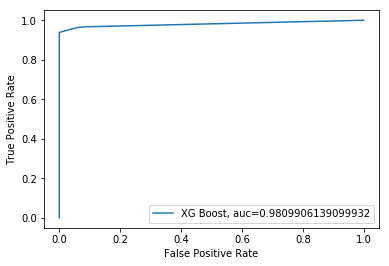

In [7]:
from xgboost import XGBClassifier

# Instantiate the  XGBoost model
xgb = XGBClassifier(learning_rate=0.0001)

# Fit the model on train

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

# Store the different evaluation values.

f1 = f1_score(y_test, xgb.predict(X_test))
precison = precision_score(y_test, xgb.predict(X_test))
recall = recall_score(y_test, xgb.predict(X_test))
roc_auc = roc_auc_score(y_test, xgb.predict(X_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


# Plot the auc-roc curve

score = roc_auc_score(y_test,y_pred)
y_pred_proba = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="XG Boost, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()